# Prophet Exploration

In this Notebook I explore using Facebook Prophet.

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
!wget -O testData.csv https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv

path = 'testData.csv'


--2020-08-26 16:10:05--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86845 (85K) [text/plain]
Saving to: ‘testData.csv’

testData.csv        100%[===================>]  84.81K  --.-KB/s    in 0.09s   

2020-08-26 16:10:05 (949 KB/s) - ‘testData.csv’ saved [86845/86845]



In [3]:
df = pd.read_csv(path)
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


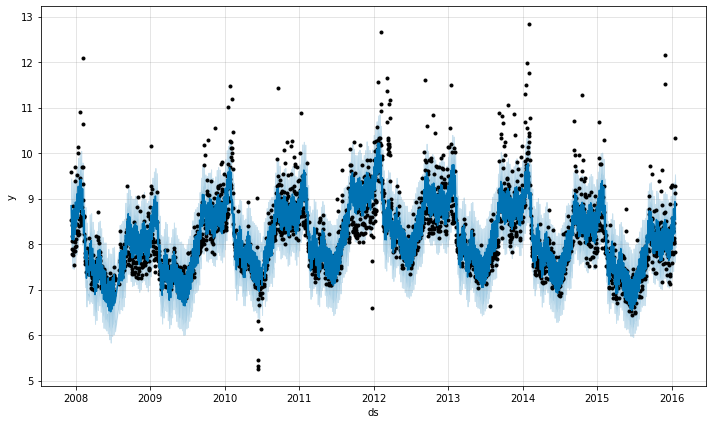

In [5]:
figure = m.plot(m.predict()) #plot itself as it currently stands

In [6]:
future = m.make_future_dataframe(periods = 365*5)

In [7]:
forecast = m.predict(future)
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2007-12-10  8.041239    8.218687    9.444723     8.041239     8.041239   
1 2007-12-11  8.039695    7.953252    9.254845     8.039695     8.039695   
2 2007-12-12  8.038151    7.766198    9.022039     8.038151     8.038151   
3 2007-12-13  8.036607    7.719887    8.960539     8.036607     8.036607   
4 2007-12-14  8.035063    7.754577    8.998732     8.035063     8.035063   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.802931              0.802931              0.802931  0.352295   
1        0.553003              0.553003              0.553003  0.119639   
2        0.350363              0.350363              0.350363 -0.066664   
3        0.329817              0.329817              0.329817 -0.072254   
4        0.319321              0.319321              0.319321 -0.069578   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.352295      0.352295  0.450636      0.450636      0.450636   
1      0.119639      0.119639  0.433364      0.433364      0.433364   
2     -0.066664     -0.066664  0.417027      0.417027      0.417027   
3     -0.072254     -0.072254  0.402070      0.402070      0.402070   
4     -0.069578     -0.069578  0.388900      0.388900      0.388900   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.844170  
1                         0.0  8.592697  
2                         0.0  8.388514  
3                         0.0  8.366423  
4                         0.0  8.354384

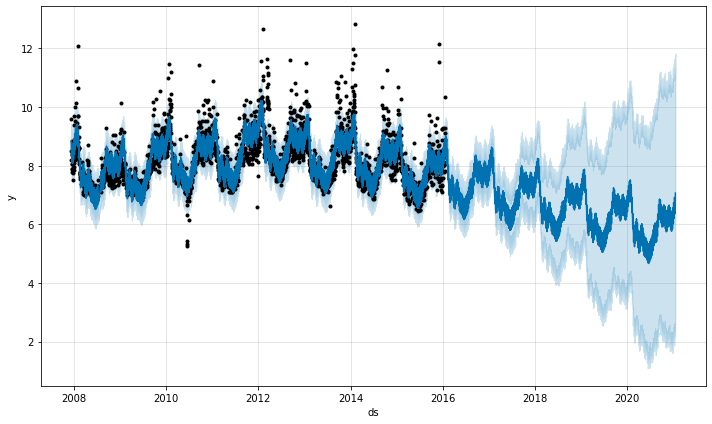

In [8]:
figure = m.plot(forecast) #plotted with the extra data

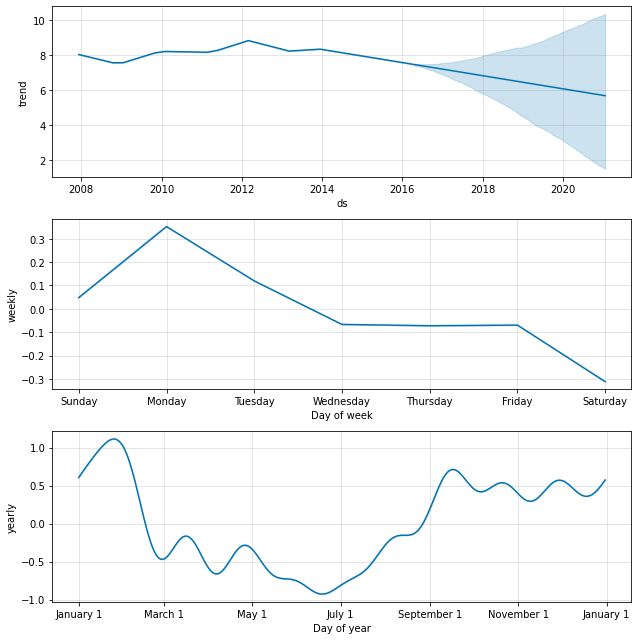

In [9]:
figure = m.plot_components(forecast)

In [10]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
import pickle

class Model:
    def __init__(self,model):
        """ model can be a model, or a path (to load a model) """
        if (isinstance(model,str)):
            self.model = self.load(model)
        else:
            self.model = model

    def save(self,path):
        """ function that accepts a path and saves model into the path """
        with open (path, "wb") as f:
            pickle.dump(self.model, f)   
            
    def load(self, path):
        """ function that accepts a path to a model and returns it """
        with open(path, 'rb') as f:
            return pickle.load(f)

class ProphetModel(Model):
    """ class specific to 'prophet' type models """
    def __init__(self,model):
        super().__init__(model)
    
    def predict(self,input_feature):
        y = self.model.predict(input_feature)
        return y

class SKlearnModel(Model):
    def __init__(self,model):
        super().__init__(model)
    
    def predict(self,input_feature):
        y = self.model.predict(input_feature)
        return y


In [12]:
# save model for use later
path = 'NewModel.pkl'
MyModel = Model(m) #this is the model we created for the timeseries data above
MyModel.save(path)


# Further exploration with fbprophet

In [13]:
#let's open the model (this is trying to emulate what will happen on the raspberry pi)
MyModel = Model('NewModel.pkl')

In [14]:
[MyModel,MyModel.model]
#model loaded OK

ds
0 2007-12-10
1 2007-12-11
2 2007-12-12
3 2007-12-13
4 2007-12-14

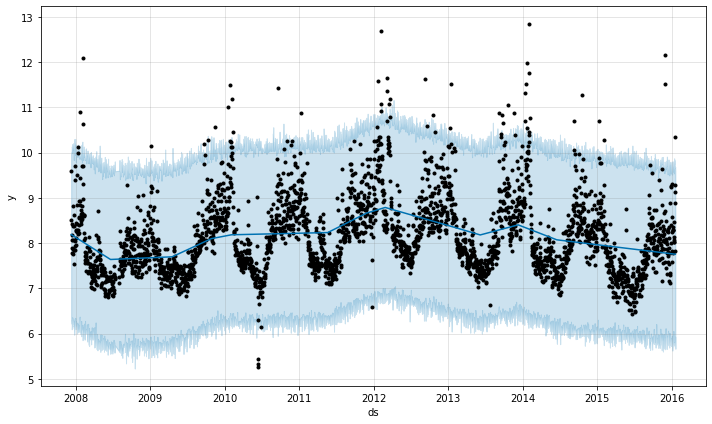

In [15]:
#let's play around with the properties of prophet!
def fitModel(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    #forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return m,forecast
    


path = 'testData.csv'
df = pd.read_csv(path)

m,pred = fitModel(df)

m.plot(pred)
forecast.head()
future.head()

#currently this graph shows trends for the whole year
#I want to be train the data ONLY for the days, and then be able to 'predict'

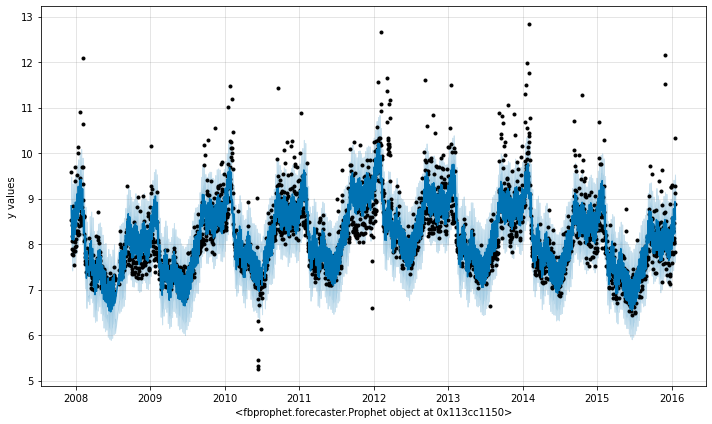

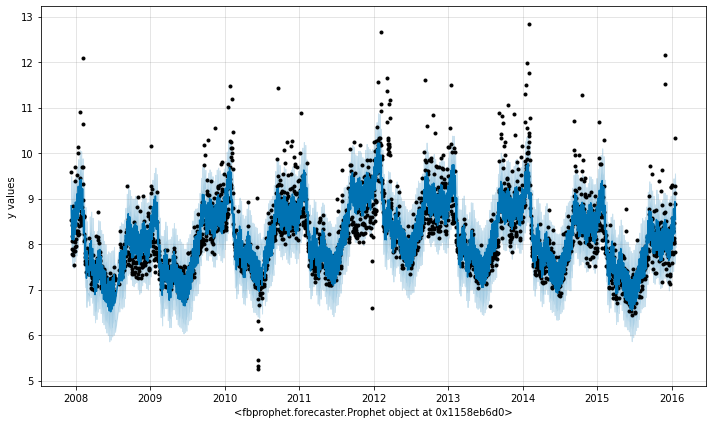

In [16]:
models = [Prophet(daily_seasonality=True),Prophet(daily_seasonality=False)]
for model in models:
    model = model.fit(df)
    forecast = model.predict(df)
    model.plot(forecast,xlabel =model,ylabel='y values')
    

In [17]:
from datetime import datetime

date = '2007-12-10'

data = pd.DataFrame(data={'ds':['2016-01-01']})
test = model.predict(data)
test.head()

#takes in ds and creates predictions based on that!


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-01  7.579044    7.459973    8.678321     7.579044     7.579044   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.518817              0.518817              0.518817 -0.069578   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.069578     -0.069578  0.588395      0.588395      0.588395   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.097861

In [18]:
#let's try this for data that has hour / minute time stamps!
!wget -O hourly.csv https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv

df_hourly = pd.read_csv('hourly.csv')
df_hourly.head()

--2020-08-26 16:10:38--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462069 (451K) [text/plain]
Saving to: ‘hourly.csv’

hourly.csv          100%[===================>] 451.24K  1.46MB/s    in 0.3s    

2020-08-26 16:10:38 (1.46 MB/s) - ‘hourly.csv’ saved [462069/462069]



ds     y
0  2017-05-01 00:00:00  27.8
1  2017-05-01 00:05:00  27.0
2  2017-05-01 00:10:00  26.8
3  2017-05-01 00:15:00  26.5
4  2017-05-01 00:20:00  25.6

In [30]:
m = Prophet()
m.fit(df_hourly)
print(m.df)
#forecast = m.predict(df_hourly)
#m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


AttributeError: 'Prophet' object has no attribute 'df'

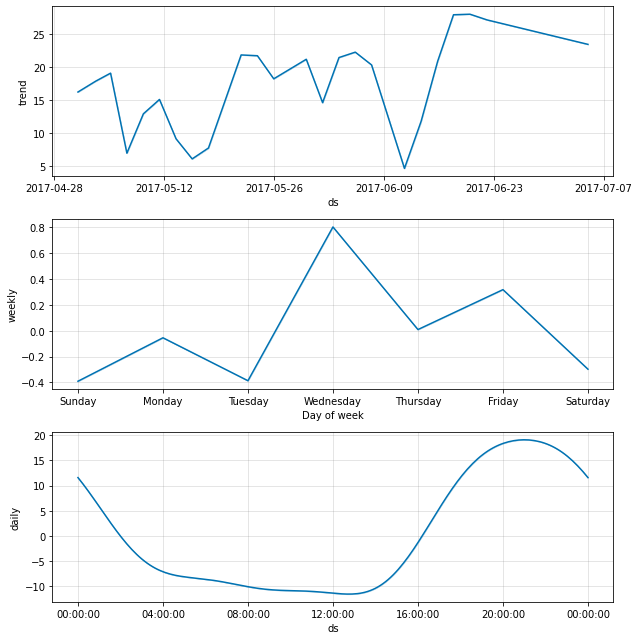

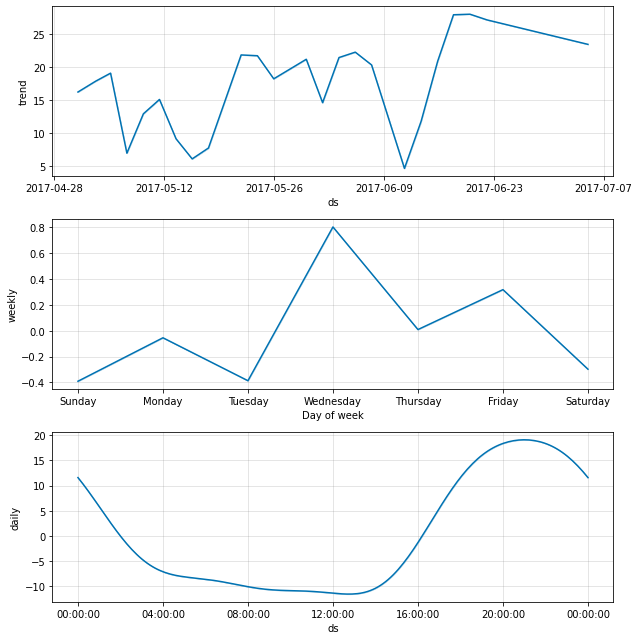

In [20]:
m.plot_components(forecast)

In [21]:
test = pd.DataFrame(data={'ds':['2017-06-09 08:00:00'],'y':[20]})

test = test.ds[0][11:] #to filter shit
test
#m.predict(test)

'08:00:00'

In [33]:
m.


AttributeError: 'Prophet' object has no attribute 'fcst'

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


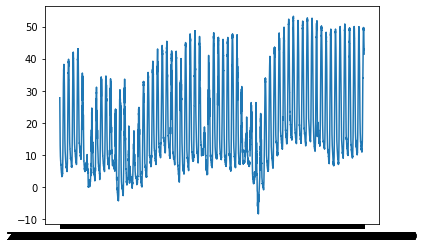